# Generation of the asymmetry

## Boltzmann equations:

#### Blotzmann equation abundance of $\varphi_i$:

\begin{equation}
\begin{gathered}
\frac{d Y_{\varphi_i}}{dx}= -\frac{x}{H(1)} \langle\Gamma_{\rm D}^{\mathrm{tot}, i}\rangle \Bigg[Y_{\varphi_i} - Y_{\varphi_i}^{\rm eq} - \frac{1}{2} \epsilon_i \frac{Y_{\varphi_i}^{\rm eq}}{Y_N^{\rm eq}} Y_{\Delta N} \Bigg] \\
- \frac{ x s}{H(1)} \Bigg[ 2\langle \sigma v \rangle _{\varphi_i\varphi_i\to\chi\chi^\ast} \big( Y_{\varphi_i}^2- \frac{Y_{\varphi_i}^{\rm eq \,2}}{Y_\chi^{\rm eq} Y_{\chi^\ast}^{\rm eq}} Y_\chi Y_{\chi^\ast}  \Big)
+2\langle \sigma v \rangle _{\varphi_i\varphi_i\to N \overline{N}} \Big( Y_{\varphi_i}^2- \frac{Y_{\varphi_i}^{\rm eq \,2}}{Y_N^{\rm eq} Y_{\overline{N}}^{\rm eq}}Y_N Y_{\overline{N}} \Big)\Bigg]
\end{gathered}
\end{equation}

#### Blotzmann equation asymmetry:

\begin{equation}
\begin{gathered}
\frac{d Y_{\Delta N}}{dx}= \sum_i\frac{x}{H(1)}\Bigg[\epsilon_i    \langle\Gamma_{\rm D}^{\mathrm{tot}, i}\rangle
\Big(Y_{\varphi_i} - Y_{\varphi_i}^{\rm eq}\Big) - \frac{1}{2}   \langle\Gamma_{\rm D}^{\mathrm{tot}, i}\rangle\frac{Y_{\varphi_i}^{\rm eq}}{Y_N^{\rm eq}} Y_{\Delta N} \Bigg] \\
+\sum_i \frac{ x s}{H(1)} \Bigg[ -2\langle \sigma v \rangle^i _{\chi\chi\to \overline{N} \overline{N}}\Big( Y_{\chi}^2-Y_{\chi^\ast}^2+ P Y_{\overline{N}}^2+ PY_{N}^2 \Big)-2\langle \sigma v \rangle ^i_{\chi N \to \chi^\ast \overline{N}}\, \Big(Y_\chi Y_N- Y_{\chi^\ast} Y_{\overline{N}} \Big)\Bigg]
\end{gathered}
\end{equation}

#### The CP-violation parameter reads:



$$\epsilon_1 = \frac{\Gamma(\varphi_1\to N \chi)-\Gamma(\varphi_1\to \overline{N} \chi^\ast)}{\Gamma(\varphi_1\to N \chi)+\Gamma(\varphi_1\to \overline{N} \chi^\ast)}=\frac{1}{8\pi|\lambda_1|^2}{\rm Im}\big[(\lambda_1\lambda_2^\ast)^2\big]\Bigg[f\left(\frac{M_2^2}{M_1^2}\right)+g\left(\frac{M_2^2}{M_1^2}\right)\Bigg],$$


where 

$$f(x)=\sqrt{x}\left[1-(1+x)\,{\rm ln}\left(\frac{1+x}{x}\right)\right],$$ 

$$g(x)=\frac{\sqrt{x}}{1-x}.$$


## Imports and definitions:

In [1]:
from math import * 

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator,NullFormatter,LogLocator)
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm
majorFormatter = FormatStrFormatter('%d')

import numpy as np
from scipy.special import zeta
from scipy.integrate import odeint, solve_ivp
from scipy.special import kn #modified Bessel function of the second kind, order n
from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar
from IPython.display import display, Markdown
import time
from f import sci_notation
import csv
from scipy.optimize import minimize_scalar
import pandas as pd
import os
from ThermalaveragePilaftsis import integrate_ann, integrate_scatt, integrate_ann_1x

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator,NullFormatter,LogLocator)
majorFormatter = FormatStrFormatter('%d')

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=12)

In [2]:
gx = 1
gN = 2 
mx = 1.9 #GeV
mN = 1 #GeV
Mpl = 2.435e18 #GeV

In [3]:
path = 'dof_table'

T_MeV = np.loadtxt(path)[:,0]
g_star_s_data = np.loadtxt(path)[:,8] #For entropy 
g_star_data = np.loadtxt(path)[:,7]


T_GeV = T_MeV / 1000 #Temperature in GeV
# x_interp = M1 / T_GeV

g_star_s_real =  interp1d(T_GeV, g_star_s_data, bounds_error=False, fill_value='nan', kind='linear') 
g_star =  interp1d(T_GeV, g_star_data, bounds_error=False, fill_value='nan', kind='linear') 

#Para tenerlo en etas
g_star_s =  interp1d(T_GeV, np.ones(len(T_GeV))*45/np.pi**4, bounds_error=False, fill_value='nan', kind='linear') 

def s(T): #GeV
    return 2 * np.pi**2 / 45 * g_star_s(T) * T**3

def YN_eq(x): #Neglecting chemical potential!
    T = M1 / x
    return 2*45 / (4*np.pi**4) * (mN/T)**2 / g_star_s(T) * kn(2, mN/T)+1e-300

def Yx_eq(x): #Neglecting chemical potential!
    T = M1 / x
    return 1*45 / (4*np.pi**4) * (mx/T)**2 / g_star_s(T) * kn(2, mx/T)+1e-300

def Yphi_eq(x):
    T = M1 / x
    return 2*45 / (4*np.pi**4) * x**2 / g_star_s(T) * kn(2, x)+1e-300

def Yphi2_eq(x):
    T = M1 / x
    return 2*45 / (4*np.pi**4) * (M2/T)**2 / g_star_s(T) * kn(2, M2/T)+1e-300

def nN_eq(x):
    T = M1 / x
    return 2 / (2*np.pi**2) * mN**2 * T * kn(2, mN/T)+1e-300

def nx_eq(x):
    T = M1 / x
    return 1 / (2*np.pi**2) * mx**2 * T * kn(2, mx/T)+1e-300

def H(T):    
    return np.pi / np.sqrt(90) * np.sqrt(g_star(T)) * (T**2) / Mpl

def rk(x):
    xt=697.5
    if x>xt:
        ratio=kn(1,xt)/kn(2,xt)
    else:
        ratio=kn(1,x)/kn(2,x)
    return ratio

def Gamma_D_tot(lambda_, M, x):
    T = M1 / x
    return lambda_**2 * M / (8 * np.pi) * rk(M/T)

def P(x):
    T = M1 / x
    return  (gx/gN)**2 * (mx/mN)**4 * (kn(2, mx/T)/kn(2, mN/T))**2

## Cross sections:

### Annihilations and scatterings in EFT (computed in external Mathematica notebook)

In [4]:
with open("Files/ThAvCrossSection_x.csv") as file:
    csvreader = csv.reader(file)
    x_table = np.array(list(csvreader)).astype(float)[0] 
    
with open("Files/ThAvCrossSection_Annihilation.csv") as file:
    csvreader = csv.reader(file)
    sigmav_ann_table = np.array(list(csvreader)).astype(float)[0]
    
with open("Files/ThAvCrossSection_Scattering.csv") as file:
    csvreader = csv.reader(file)
    sigmav_scatt_table = np.array(list(csvreader)).astype(float)[0]   /   8 #Factor 8

sigmav_ann_interp = interp1d(np.log10(x_table), np.log10(sigmav_ann_table), kind='linear')   
sigmav_scatt_interp = interp1d(np.log10(x_table), np.log10(sigmav_scatt_table), kind='linear')

def sigma_ann_EFT(T, Lambda):
    return 10**sigmav_ann_interp(np.log10(mx/T)) / Lambda**2

def sigma_scatt_EFT(T, Lambda2):
    return 10**sigmav_scatt_interp(np.log10(mx/T))/ Lambda2**2

In [5]:
with open("Files/ThAvCrossSection_phi_x.csv") as file:
    csvreader = csv.reader(file)
    x_table_phi = np.array(list(csvreader)).astype(float)[0]  #x is respect to M1
    
with open("Files/ThAvCrossSection_phi_chi.csv") as file:
    csvreader = csv.reader(file)
    sigmav_phi_chi_table = np.array(list(csvreader)).astype(float)[0]
    
with open("Files/ThAvCrossSection_phi_N.csv") as file:
    csvreader = csv.reader(file)
    sigmav_phi_N_table = np.array(list(csvreader)).astype(float)[0]   
    
sigmav_phi_chi_interp = interp1d(np.log10(x_table_phi), np.log10(sigmav_phi_chi_table), kind='linear')
sigmav_phi_N_interp = interp1d(np.log10(x_table_phi), np.log10(sigmav_phi_N_table), kind='linear')   

def sigmav_phi_chi(T, lambdaj, Mj):
    return 10**sigmav_phi_chi_interp(np.log10(M1/T)) * (lambdaj**4 / Mj**2) 

def sigmav_phi_N(T, lambdaj, Mj):
    return 10**sigmav_phi_N_interp(np.log10(M1/T)) * (lambdaj**4 / Mj**2) 

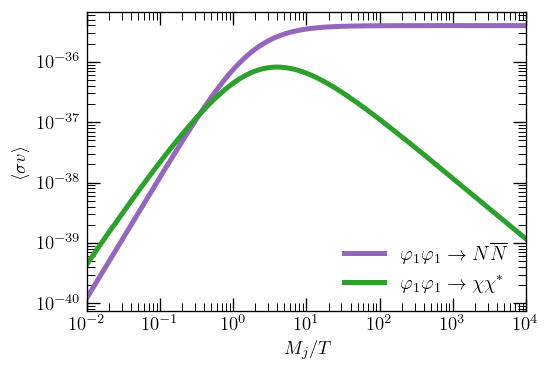

In [6]:
fig, ax = plt.subplots(figsize=(4.72, 4.72*(0.7)), dpi=120)

M1 = 1e5

xspace = np.logspace(-2, 4, 1000)
Tspace = M1 / xspace

plt.loglog(xspace, sigmav_phi_N(Tspace, 1e-6, M1), color='tab:purple', linewidth=3, label=r'$\varphi_1\varphi_1\to N \overline{N}$')
plt.loglog(xspace, sigmav_phi_chi(Tspace, 1e-6, M1), color='tab:green', linewidth=3, label=r'$\varphi_1\varphi_1 \to \chi\chi^\ast$')

plt.legend(loc=0, prop={'size': 12}, frameon=False)

plt.tick_params(which='both', bottom=True, top=True, left=True, right=True)
plt.tick_params(axis='both', which='major', direction='in', length = 8, labelsize=11)
plt.tick_params(axis='both', which='minor', direction='in', length = 5, labelsize=11)

ax.set_xlim([xspace[0], xspace[-1]])
# plt.ylim(1e-6, 2e-1)
plt.xlabel(r'$M_j/T$', fontsize=11)
plt.ylabel(r'$\langle \sigma v \rangle$', fontsize=11)
ax.set_yscale('log')
ax.set_xscale('log')

plt.show()

### Annihilations and scatterings in full theory from Mathematica

The annihilation cross section for $NN \to \chi^\ast \chi^\ast$ is given by thermally averaging the expression:


$$
\sigma_{NN \rightarrow \chi^\ast \chi^\ast}%=\sum\limits_{i=1}^2\frac{|\lambda_i|^4}{16\pi s}\left(\frac{s}{M_i^{2}+s}+\frac{2\log\left(1+\frac{s}{M_i^2}\right)}{2+\frac{s}{M_i^2}}\right),\\
=\frac{4 \pi c_i}{s}\sum\limits_{i=1}^2\left(\frac{1}{1+\frac{a_i}{x}}+\frac{1}{1+\frac{x}{2a_i}}\log \left(1+\frac{x}{a_i}\right)\right),$$

where $i=1,2$ labels the mediating $\varphi_i$, and we have defined:


\begin{align} 
&y \equiv \frac{s}{M_1^2}, \quad
a_i \equiv \left(\frac{M_i}{M_1}\right)^2, \quad
c_i \equiv \left(\frac{|\lambda_i|^2}{8\pi}\right)^2. 
\end{align}
Similarly, the cross section for scatterings $\chi N \rightarrow \chi^\ast \bar{N}$ is given by integrating
\begin{align}
    \sigma_{\chi N \rightarrow \chi^\ast \bar{N}}=\frac{16 \pi c_i}{s}\sum \limits_{i=1}^2 \Bigg(&\frac{y^2-a_i^2+a_i\left(c_i+\frac{1}{2}y\right)}{\left(y-a_i\right)^2 +a_ic_i}\\
       & -\frac{3y^2-a_i^2-2a_i y+ a_ic_i}{\left(y-a_i\right)^2 +a_ic_i}\frac{a_i}{y}\log\frac{a_i+y}{a_i}\Bigg).
\end{align}


These integrations are performed in a Mathematica notebook and the results imported here.

The annihilations are imported once and then rescaled for the set of $\lambda_1$, $\lambda_2$ and $M_1$. $M_2$ is assumed to be $10^3 M_1$.

In [11]:
path = "/home/mar/Desktop/DM_baryogenesis_without_B_violation/Paper_Darkogenesis/PilaftsisRatesFiles/"

with open(path+"GAnn1.dat", encoding="utf8") as raw_data:
    GAR1 = np.loadtxt(raw_data)

with open(path+"GAnn2_PreReh.dat", encoding="utf8") as raw_data:
    GAR2 = np.loadtxt(raw_data)

xAnnspace=GAR1[:, 0]
GAR1table=GAR1[:, 1]
GAR1Int=interp1d(np.log10(xAnnspace),np.log10(GAR1table), kind='linear', bounds_error=False)
GAR2table=GAR2[:, 1]
GAR2Int=interp1d(np.log10(xAnnspace), np.log10(GAR2table), kind='linear', bounds_error=False)

def gammaAnn1(x, l1, M1):
    return (l1**4)*(10**GAR1Int(np.log10(x)))*(M1**4)
 
def gammaAnn2(x, l2, M1):    
    return (l2**4)*(10**GAR2Int(np.log10(x)))*(M1**4)

def sigmavAnn(x, l1, l2, M1): #Extended with the scaled EFT so that it takes into account the boltzmann supression
    if x > np.max((M1/(mx/x_table[0]), 1e2)):
        M2 = 1e3 * M1
        Lambda_2 = 1/(1/(M1/(l1**2))+1/((M2)/(l2**2))) 
        return 4*sigma_ann_EFT(M1/x, Lambda_2) * P(x)
    else:
        if not np.isnan(gammaAnn1(x, l1, M1)):
            return (gammaAnn1(x, l1, M1) + gammaAnn2(x, l2, M1)) / (nN_eq(x)**2) 
        elif x >1e-5: 
            return (gammaAnn1(xAnnspace[-1], l1, M1) + gammaAnn2(xAnnspace[-1], l2, M1)) / (nN_eq(xAnnspace[-1])**2) 
        else:
            return np.nan
        
with open(path+"L1spaceScatt_PreReh.dat", encoding="utf8") as raw_data:
    lambda_1s_scatt = np.loadtxt(raw_data)
# lambda_1s=[lambda_1s_scatt.item()]

with open(path+"L2spaceScatt_PreReh.dat", encoding="utf8") as raw_data:
    lambda_2s_scatt = np.loadtxt(raw_data)
    
with open(path+"GScatt1_PreReh.dat", encoding="utf8") as raw_data:
    GSR1 = np.loadtxt(raw_data)
with open(path+"GScatt2_PreReh.dat", encoding="utf8") as raw_data:
    GSR2 = np.loadtxt(raw_data)
    
xScattspace = GSR1[:,0]

GSR1Int = np.empty_like(lambda_1s_scatt, dtype=object)
for i_l1 in range(0, len(lambda_1s_scatt)):

    GSR1table = GSR1[:, i_l1+1]
    GSR1Int[i_l1] = interp1d(np.log10(xScattspace), np.log10(GSR1table), kind='linear', bounds_error=False)
    
GSR2Int = np.empty_like(lambda_2s_scatt, dtype=object)
for i_l2 in range(0, len(lambda_2s_scatt)):

    GSR2table = GSR2[:, i_l2+1]
    GSR2Int[i_l2] = interp1d(np.log10(xScattspace), np.log10(GSR2table), kind='linear', bounds_error=False)

def find_closest_value_index(arr, target):
    return min(range(len(arr)), key=lambda i: abs(arr[i] - target))

def gammaScatt1(x, l1, lambda_1s, M1):
    j_l1 = find_closest_value_index(lambda_1s, l1)
#     if j_l1 == len(lambda_1s)-1 or j_l1==0:
#         print('No such lambda_1')
#     print(lambda_1s[j_l1])
    return (10**GSR1Int[j_l1](np.log10(x)))*(M1**4)

def gammaScatt2(x, l2, lambda_2s, M1):
    j_l2 = find_closest_value_index(lambda_2s, l2)
#     print(l2, lambda_2s[j_l2])
    if j_l2 == len(lambda_2s)-1 or j_l2==0:
        print('No such lambda_2')
    return (10**GSR2Int[j_l2](np.log10(x)))*(M1**4)


def sigmavScatt(x, l1, lambda_1s, l2, lambda_2s, M1): #Extended with the scaled EFT so that it takes into account the boltzmann supression

    if x > np.max((M1/(mx/x_table[0]), 1e2)):
        M2 = 1e3 * M1
        Lambda_2 = 1/(1/(M1/(l1**2))+1/((M2)/(l2**2))) 
        return 16*sigma_scatt_EFT(M1/x, Lambda_2)
    else:
        if not np.isnan(gammaScatt1(x, l1, lambda_1s, M1)):
            return (gammaScatt1(x, l1, lambda_1s, M1) + gammaScatt2(x, l2, lambda_2s, M1)) / (nN_eq(x)*nx_eq(x)) 
        elif x > 1e-5: 
            return (gammaScatt1(xScattspace[-1], l1, lambda_1s, M1) + gammaScatt2(xScattspace[-1], l2, lambda_2s, M1)) / (nN_eq(xScattspace[-1])*nx_eq(xScattspace[-1])) 
        else:
            return np.nan

In [12]:
M1 = 1e6
M2 = 1e3*M1
lambda_1 = 1e-4
lambda_2 = 10**(-4.5)

np.log10(1/(((lambda_1**2)/M1)+(lambda_2**2)/((M2))))

13.999956572723137

In [13]:
x_plots = np.logspace(-6, 4, 100)
sigmavAnn_plot = np.zeros(len(x_plots))
sigmavScatt_plot = np.zeros(len(x_plots))
i = 0
for x_plot in x_plots: 
    sigmavAnn_plot[i] = sigmavAnn(x_plot, lambda_1, lambda_2, M1)
    sigmavScatt_plot[i] = sigmavScatt(x_plot, lambda_1, lambda_1s_scatt, lambda_2, lambda_2s_scatt, M1)
    i+=1

In [14]:
def Lambda2_from_params(lambda_1, lambda_2, M1, M2):
    return 1/(((lambda_1**2)/M1)+(lambda_2**2)/((M2)))

<ipython-input-3-46d17ea9475d>:61: RuntimeWarning: invalid value encountered in divide
  return  (gx/gN)**2 * (mx/mN)**4 * (kn(2, mx/T)/kn(2, mN/T))**2


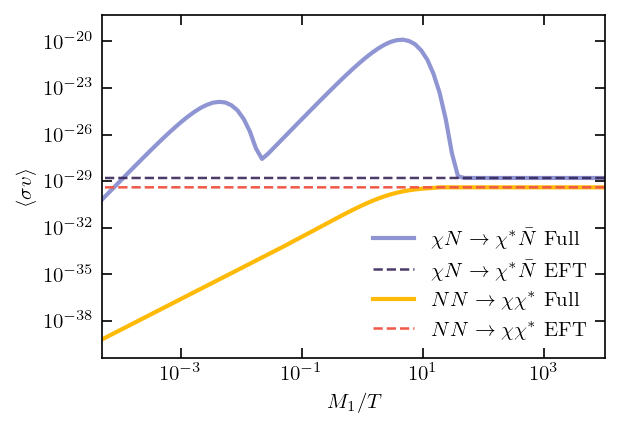

In [15]:
fig, ax = plt.subplots(figsize=(4.33, 4.33*(0.7)), dpi=150)

# for x_plot in x_plots: 
plt.loglog(x_plots, sigmavScatt_plot, '-', color='#8F95D3', linewidth=2, label=r'$\chi N \rightarrow \chi^\ast \bar{N}$ Full', alpha=1, zorder=1)

x_EFT = np.append(1e-6,np.logspace(3,9,50))
plt.loglog(x_EFT, 
           np.append(sigma_scatt_EFT(M1/1e3, Lambda2_from_params(lambda_1, lambda_2, M1, M2)/4),
                     sigma_scatt_EFT(M1/np.logspace(3,9,50), Lambda2_from_params(lambda_1, lambda_2, M1, M2)/4)),
           '--', color='#392759', linewidth=1.2, label=r'$\chi N \rightarrow \chi^\ast \bar{N}$ EFT', zorder=1, alpha=0.9)


plt.loglog(x_plots, sigmavAnn_plot, '-',  color='#FFBA08', linewidth=2, label=r'$NN \to  \chi\chi^\ast$ Full', alpha=1, zorder=1)


plt.loglog(x_EFT, 
           np.append(P(1e3)*sigma_ann_EFT(M1/1e3, Lambda2_from_params(lambda_1, lambda_2, M1, M2)/2) , 
                     P(np.logspace(3,9,50))*sigma_ann_EFT(M1/np.logspace(3,9,50), Lambda2_from_params(lambda_1, lambda_2, M1, M2)/2)),
           '--r', color='#F15946', linewidth=1.2, label=r'$NN \to  \chi\chi^\ast$ EFT', zorder=1)


ax.set_xlim(5e-5, 1e4)
ax.set_ylim(4e-41, 0.5e-18)

# Configuración de ticks para ax
ax.tick_params(which='both', bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='both', which='major', direction='in', length=5, labelsize=10)
ax.tick_params(axis='both', which='minor', direction='in', length=3, labelsize=10)


plt.xlabel('$M_1/T$', fontsize=10)
plt.ylabel(r'$\langle \sigma v \rangle$', fontsize=10)


plt.legend(frameon=False, fontsize=10)

# plt.savefig('/home/mar/Dropbox/Thesis/Figures/IntegratedPilaftsis.pdf', bbox_inches='tight')

plt.show()

## Integration including $\phi_2$ and scatterings

### Definitions:

In [29]:
def Lambda2_wo(Tlepto):
    sv = sigmav_ann_table[0]
    num = sv*s(Tlepto)
    den = H(Tlepto)
    return np.sqrt(num/den)

def TempLepto_M(l1, M1):
    return np.sqrt(Mpl * Gamma_D_tot(l1, M1, 1e15) * np.sqrt(90) / np.pi / np.sqrt(g_star(T_GeV[-1])))

def rk(x):
    xt=697.5
    if x>xt:
        ratio = kn(1,xt)/kn(2,xt)
    else:
        ratio = kn(1,x)/kn(2,x)
    return ratio

def K(x, lambda_1, M1):
    return np.sqrt(90) * lambda_1**2 * Mpl / (8*np.pi**2 * np.sqrt(g_star(M1/x)) * M1)

We can express the complex couplings as $\lambda_i\equiv |\lambda_i|{\rm e}^{i\phi_i}$, and then we find


$${\rm Im}\Big[\big(\lambda_1(\lambda_2^\ast)^2\big)\Big]={\rm Im}\Big[\big(|\lambda_1|{\rm e}^{i\phi_1}|\lambda_2|{\rm e}^{-i\phi_2}\big)^2\Big]={\rm Im}\Big[\big(|\lambda_1|^2|\lambda_2|^2{\rm e}^{i2\left(\phi_1-\phi_2\right)}\big)\Big]= |\lambda_1|^2|\lambda_2|^2 \,{\rm sin}\big(2\left(\phi_1-\phi_2\right)\big),$$

and therefore 

$$\epsilon_1 = \frac{1}{8\pi}|\lambda_2|^2 \,{\rm sin}\big(2\left(\phi_1-\phi_2\right)\big)\Bigg[f\left(\frac{M_2^2}{M_1^2}\right)+g\left(\frac{M_2^2}{M_1^2}\right)\Bigg],$$

For $\epsilon_2$ we have then


$$\epsilon_2 = \frac{1}{8\pi}|\lambda_1|^2 \,{\rm sin}\big(2\left(\phi_2-\phi_1\right)\big)\Bigg[f\left(\frac{M_1^2}{M_2^2}\right)+g\left(\frac{M_1^2}{M_2^2}\right)\Bigg],$$

In [30]:
def f(x):
    return np.sqrt(x) * ( 1 - (1+x)*np.log((1+x) / x) )

def gg(x):
    return np.sqrt(x) / (1-x)

def epsilon_1(M1, M2, mod1, mod2, ph1, ph2):
    x = M2**2 / M1**2
    if x < 1e5:
        return 1/(8*np.pi)* mod2**2 * np.sin( 2*(ph1-ph2) ) * (f(x) + (1/2)*gg(x))
    else:
        return 1/(8*np.pi)* mod2**2 * np.sin( 2*(ph1-ph2) ) * (-1/np.sqrt(x))
    

def epsilon_2(M1, M2, mod1, mod2, ph1, ph2):
    x = M1**2 / M2**2
    if x > 1e-5:
        return 1/(8*np.pi)* mod1**2 * np.sin( 2*(ph2-ph1) ) * (f(x) + (1/2)*gg(x))
    else:
        return 1/(8*np.pi)* mod1**2 * np.sin( 2*(ph2-ph1) ) * ((1/2)*np.sqrt(x)*(3-2*np.log(1/x)))


ph1 = 0
ph2 = np.pi/4

### Differential equations:

In [31]:
def eqs_2_noScatts(x, Y12N_s):
    
    Yphi1, Yphi2, YDN = Y12N_s 
    
    f = [ - x / H(M1) * Gamma_D_tot(lambda_1, M1, x) * (Yphi1 - Yphi_eq(x)),
          - x / H(M1) * Gamma_D_tot(lambda_2, M2, x) * (Yphi2 - Yphi2_eq(x)),
            x / H(M1) * (Gamma_D_tot(lambda_1, M1, x) * (epsilon1*(Yphi1-Yphi_eq(x)) - 0.5 * Yphi_eq(x)/YN_eq(x) * YDN ) 
                        +Gamma_D_tot(lambda_2, M2, x) * (epsilon2*(Yphi2-Yphi2_eq(x)) - 0.5 * Yphi2_eq(x)/YN_eq(x) * YDN ))
        ]
    return f

def eqs_2_Scatts_Pilaftsis(x, Y12N_s):
    
    Yphi1, Yphi2, YDN = Y12N_s 
    
    Yx = Yx_eq(x) + YDN/2
    Yk = Yx_eq(x) - YDN/2
    YN = YN_eq(x) + YDN/2
    YM = YN_eq(x) - YDN/2
        
    f = [ - x / H(M1) * Gamma_D_tot(lambda_1, M1, x) * (Yphi1 - Yphi_eq(x)),
          - x / H(M1) * Gamma_D_tot(lambda_2, M2, x) * (Yphi2 - Yphi2_eq(x)),
           x / H(M1) * (Gamma_D_tot(lambda_1, M1, x) * (epsilon1*(Yphi1-Yphi_eq(x)) - 0.5 * Yphi_eq(x)/YN_eq(x) * YDN ) 
                        +Gamma_D_tot(lambda_2, M2, x) * (epsilon2*(Yphi2-Yphi2_eq(x)) - 0.5 * Yphi2_eq(x)/YN_eq(x) * YDN ))
             + (x*s(M1/x)/H(M1))* (-2*sigmavAnn(x, lambda_1, lambda_2, M1)* (YN**2 - YM**2 - (1/P(x))*(Yk**2 - Yx**2)) -2*sigmavScatt(x, lambda_1, lambda_1s_scatt, lambda_2, lambda_2s_scatt, M1) * (Yx*YN-Yk*YM))
        ]
    return f


In [32]:
def widthphi1(l1, mm1): #correct
    prefac=2/(16*np.pi)
    num=l1**2 * mm1
    return prefac*num

def ngamma(T):    #correct 
    return 2*(T**3)/(np.pi**2);

def etaeq(x): #correct
    return 2/4*(x**2)*kn(2,x)

def gammaD(x,ll,mm): #correct? Da mejor con kn1 pero yo creia que era kn2
    return (x**2)/2 * widthphi1(ll, mm) * (kn(1,x))

def Gamma_D_tot(lambda_, M, x):
    T = M1 / x
    return lambda_**2 * M / (8 * np.pi) * rk(M/T)

def eqs_phi1etaLWithScatN1N2(x, eta2D):
    etaPhi1, etaPhi2, etaL = eta2D   
    xs = M2/M1*x
    
    GAnn = sigmavAnn(x, lambda_1, lambda_2, M1)*nN_eq(x)**2/ngamma(M1/x)
    GScatt = sigmavScatt(x, lambda_1, lambda_1s_scatt, lambda_2, lambda_2s_scatt, M1)*(nN_eq(x)*nx_eq(x))/ngamma(M1/x)

    f=[x/H(M1)   *  (etaeq(x)-etaPhi1)*Gamma_D_tot(lambda_1, M1, x),
       0* x/H(M1)  *  (etaeq(xs)-etaPhi2)*Gamma_D_tot(lambda_2, M2, x),
      -x/H(M1)*(epsilon1*(etaeq(x)-etaPhi1)*Gamma_D_tot(lambda_1, M1, x) + epsilon2*(etaeq(xs)-etaPhi2)*Gamma_D_tot(lambda_2, M2, x) + etaL*(gammaD(x,lambda_1,M1)+gammaD(xs,lambda_2,M2)+(2*GAnn+GScatt)*12)/2)]

    return f

In [34]:
def plot(Yphi1, YDNsinW, YDNconW, Yphi2):
    x_plot = np.logspace(-2, np.log10(xint[-1]), 10000)

    fig, ax = plt.subplots(1, 1, figsize=(7,5), dpi=80)
    plt.title(r'$M_1 = {}$ GeV, $M_2 = {}$ GeV, $\lambda_1 = {}$,  $\lambda_2 = {}$,'.format(sci_notation(M1,-1),sci_notation(M2,-1), sci_notation(lambda_1), sci_notation(lambda_2)), fontsize = 18, y=1.04)

    plt.plot(x_plot, Yphi1(x_plot), color='tab:green', linewidth=3, label=(r'$Y_{\varphi_1}$'))
    
    if (Yphi2):
        plt.plot(x_plot, Yphi2(x_plot), color='tab:orange', linewidth=3, label=(r'$Y_{\varphi_2}$'))
        plt.plot(x_plot, Yphi2_eq(x_plot), color='k', linestyle='--', linewidth=1.5)#, label=(r'$Y_{\varphi_1}^{\rm{eq}}$'))

    plt.plot(x_plot, YDNsinW(x_plot), color='tab:purple' ,linewidth=3, label=(r'$|Y_{\Delta N}|$'))
    plt.plot(x_plot, -YDNsinW(x_plot), color='tab:purple', linestyle='--', linewidth=3, label=(r'$|Y_{\Delta N}|$'))

    plt.plot(x_plot, YDNconW(x_plot), color='tab:red' ,linewidth=3, label=(r'$|Y_{\Delta N}|$'))
    plt.plot(x_plot, -YDNconW(x_plot), color='tab:red', linestyle='--', linewidth=3, label=(r'$|Y_{\Delta N}|$'))
    
    plt.plot(x_plot, Yphi_eq(x_plot), color='k', linestyle='--', linewidth=1.5, label=(r'$Y_{\varphi_1}^{\rm{eq}}$'))

    plt.hlines(eta_today(8.8e-11), 0.001, 10000)
    
    plt.yscale("log")
    plt.xscale("log")
    plt.ylim(1.1e-24,1e0)
    plt.xlim(x_plot[0], x_plot[-1])
    
    locmin_y = LogLocator(base=10, subs=(1.0, ), numticks=100)
    ax.yaxis.set_minor_locator(locmin_y)
    ax.yaxis.set_minor_formatter(NullFormatter())

    plt.tick_params(which='both', bottom=True, top=True, left=True, right=True)
    plt.tick_params(axis='both', which='major', direction='in', length = 6, labelsize=18)
    plt.tick_params(axis='both', which='minor', direction='in', length = 4, labelsize=18)
#     plt.tick_params(labelright=True)
    plt.legend(loc=(1.1, 0.2), prop={'size': 18}, frameon=False)

    plt.xlabel(r'$M_1/T$', fontsize=18)
    plt.ylabel(r'$Y$', fontsize=18)
    

In [35]:
T0 = 2.34393e-13 #GeV
n_gamma = 2/np.pi**2 * 1.2 * T0**3
s0_GeV3 = 2.28e-38 #GeV^3

# def n_gamma_T(T):
#     return 2/np.pi**2 * 1.2 * T**3

def eta(Y):
    return Y / 4.419112e-3

def eta_today(Y):
    return Y * s0_GeV3 / n_gamma

### Numerical integration 

In [ ]:
lambda_1 = 10**(-4.6)

M1 = 1e7
M2 = 1e3*M1
Y12N_0 = [Yphi_eq(0.001), 0, 0]
Y1N_s = [0, 0]
xint = np.logspace(-1, 3.5, 100000) 

lambda_2s = np.concatenate((np.logspace(-2.5, -1.15, 70), np.logspace(-1.14, -0.5, 40)))
# lambda_2s = np.logspace(-2.5, -0.5, 90)

# lambda_2s = np.logspace(-2.5, -0.5, 10)

DN_2n_fin1 = np.zeros(len(lambda_2s))
DN_2sPJ_fin1 = np.zeros(len(lambda_2s))

i = 0
for lambda_2 in lambda_2s[:]:

    epsilon1 = epsilon_1(M1, M2, lambda_1, lambda_2, 0, np.pi/4)
    epsilon2 = epsilon_2(M1, M2, lambda_1, lambda_2, 0, np.pi/4)

    ############################################
    Y_sol3, fo = odeint(eqs_2_noScatts, Y12N_0, xint, tfirst=True, atol=1e-25, rtol=1e-4, full_output=1)
    if fo['message']=='Integration successful.':
        DN_2n_fin1[i] = Y_sol3[-1,2]
    else:
        DN_2n_fin1[i] = np.nan
    
    Y_sol_1_interp3 = interp1d(xint, Y_sol3[:,0], bounds_error=False, fill_value='nan', kind='linear') 
    Y_sol_2_interp3 = interp1d(xint, Y_sol3[:,1], bounds_error=False, fill_value='nan', kind='linear')
    Y_sol_DN_interp3 = interp1d(xint, Y_sol3[:,2], bounds_error=False, fill_value='nan', kind='linear')
    def Yphi1_3(x):
        return np.squeeze(Y_sol_1_interp3(x).transpose())
    def Yphi2_3(x):
        return np.squeeze(Y_sol_2_interp3(x).transpose())
    def YDN_3(x):
        return np.squeeze(Y_sol_DN_interp3(x).transpose())

    print(4*i+1,'/', len(lambda_2s)*5, np.log10(lambda_2), '1')

    
    ############################################ 
    

    Y_solpart12 = solve_ivp(eqs_phi1etaLWithScatN1N2, (xint[0], xint[-1]), Y12N_0, method='LSODA',  atol=1e-25, rtol=3e-4)
    sanitised=Y_solpart12.y[2,-1]
    
    if Y_solpart12.success:
        DN_2sPJ_fin1[i] = Y_solpart12.y[2, -1]  # Último valor de la tercera variable en la solución
    else:
        DN_2sPJ_fin1[i] = np.nan

    Y_sol_1_interp6 = interp1d(Y_solpart12.t, Y_solpart12.y[0, :], bounds_error=False, fill_value=np.nan, kind='linear')
    Y_sol_2_interp6 = interp1d(Y_solpart12.t, Y_solpart12.y[1, :], bounds_error=False, fill_value=np.nan, kind='linear')
    Y_sol_DN_interp6 = interp1d(Y_solpart12.t, Y_solpart12.y[2, :], bounds_error=False, fill_value=np.nan, kind='linear')

    def Yphi1_6(x):
        return np.squeeze(Y_sol_1_interp6(x).transpose())
    def Yphi2_6(x):
        return np.squeeze(Y_sol_2_interp6(x).transpose())
    def YDN_6(x):
        return np.squeeze(Y_sol_DN_interp6(x).transpose())
       
    plot(Yphi1_6, YDN_3, YDN_6, Yphi2_6)
    plt.show()
    print(4*i+4,'/', len(lambda_2s)*5, np.log10(lambda_2), '4')


    i+=1
    

In [22]:
T0 = 2.34393e-13 #GeV
n_gamma = 2/np.pi**2 * 1.2 * T0**3
s0_GeV3 = 2.28e-38 #GeV^3


def eta_today(Y):
    return Y * s0_GeV3 / n_gamma

In [34]:
eta_today(2.3e-10)

1.6746238566811458e-09

In [44]:
# def Y_today_from_eta(eta):
#     return eta / s0_GeV3 * n_gamma

def Y_HT_from_eta(eta):
    return eta * (45*1.2) / np.pi**4 / g_star_s_real(1e6)

In [42]:
lambda_2s2 = np.concatenate((np.logspace(-2.5, -1.15, 70), np.logspace(-1.14, -0.5, 40)))
lambda_2s = np.logspace(-2.5, -0.5, 90)

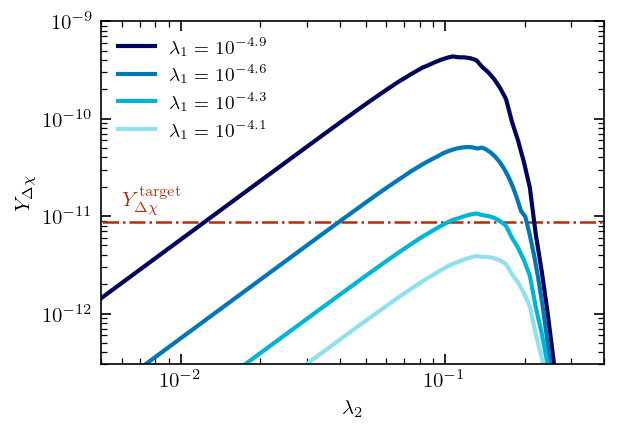

In [58]:
# Crear la figura y los subplots
fig, ax1 = plt.subplots(1, 1, figsize=(4.33, 4.33 * 0.7), dpi=150, sharey=True)

# Primer subplot

#-4.9
ax1.loglog(lambda_2s[np.isfinite(DN_2sPJ_fin2)][:],
           Y_HT_from_eta(np.abs(DN_2sPJ_fin2[np.isfinite(DN_2sPJ_fin2)][:])),
           '-', color='#03045e', linewidth=2, label=r'$\lambda_1=10^{-4.9}$')

#-4.6
ax1.loglog(lambda_2s2[np.isfinite(DN_2sPJ_fin1)][:],
           Y_HT_from_eta(np.abs(DN_2sPJ_fin1[np.isfinite(DN_2sPJ_fin1)][:])),
           '-', color='#0077b6', linewidth=2, label=r'$\lambda_1=10^{-4.6}$')

#-4.3
ax1.loglog(lambda_2s[np.isfinite(DN_2sPJ_fin4)][:],
           Y_HT_from_eta(np.abs(DN_2sPJ_fin4[np.isfinite(DN_2sPJ_fin4)][:])),
           '-', color='#00b4d8', linewidth=2, label=r'$\lambda_1=10^{-4.3}$')

#-4.1
ax1.loglog(lambda_2s[np.isfinite(DN_2sPJ_fin3)][:],
           Y_HT_from_eta(np.abs(DN_2sPJ_fin3[np.isfinite(DN_2sPJ_fin3)][:])),
           '-', color='#90e0ef', linewidth=2, label=r'$\lambda_1=10^{-4.1}$')




YDxtarget = 2.3e-10 / (g_star_s_real(M1) / g_star_s_real(0.00001)) 
ax1.hlines(YDxtarget, 1e-5, 1, color='#B02E0C', linewidth=1.2, linestyle='dashdot')
ax1.text(0.6e-2, YDxtarget*1.5, r'$Y_{\Delta \chi}^{\rm target}$', color='#B02E0C' , fontsize=10)




ax1.set_xlabel(r'$\lambda_2$', fontsize=10)
ax1.set_ylabel(r'$Y_{\Delta \chi}$', fontsize=10)


# for ax in [ax1, ax2]:
ax1.set_ylim(3e-13, 1e-9)
ax1.set_xlim(5e-3, 4e-1)

ax1.tick_params(which='both', bottom=True, top=True, left=True, right=True)
ax1.tick_params(axis='both', which='major', direction='in', length=5, labelsize=10)
ax1.tick_params(axis='both', which='minor', direction='in', length=3, labelsize=10)

# ax2.set_xlabel(r'$\lambda_2$', fontsize=10)
ax1.legend(loc=2, prop={'size': 9}, frameon=False)

# Guardar la figura
# plt.savefig('/home/mar/Dropbox/Thesis/Figures/Lepto_lambda2_sols.pdf', bbox_inches='tight')

plt.show()

## Integration and parameter space scan

#### This part solves the diferential equations many times for each point in parameter space. Takes a long time to run.

In [54]:
M1_s_old = np.logspace(4.2, 11, 60)   
M1_s_extra = np.logspace(3.8, 4.15, 4)
M1_s = np.concatenate((M1_s_extra, M1_s_old))
lambda_1s = np.logspace(-1.5, -6.8, 60) 
lambda2_solutions_ParSpace = np.full((len(M1_s), len(lambda_1s), 2), np.nan)

In [77]:
Lambda2wossave = np.zeros((len(M1_s), len(lambda_1s)))
T_leptosave = np.zeros((len(M1_s), len(lambda_1s)))
epsilon1saved = np.zeros((len(M1_s),len(lambda_1s), 2))
epsilon2saved = np.zeros((len(M1_s),len(lambda_1s), 2))

In [ ]:
jm_in = 0
jm_fin = 64
i_in = 0
i_fin = 60
M1_s_running = M1_s[jm_in:jm_fin]
lambda_1s_running = lambda_1s[i_in:i_fin]

max_iterations = 20  # Maximum allowed iterations to prevent infinite loops
l2_toohigh = 15
Y_too_small = 1e-20
atol = 1e-16
rtol = 3e-3

initial_n_points = 5 #Important that these numbers must be different
indepth_n_points_in = 10
number_points_cuatro = 4

path='/home/mar/Desktop/DM_baryogenesis_without_B_violation/Files/'
xint = np.logspace(-2, 3, 10000) 
Y_B_obs = eta_today(2.3e-10) #Esto es el eta a high temperatures, lo convierto con today porque el YDc


try:
    os.remove(path+'lambda2ssave_iterative.csv')
except:
    print('hey')
jumpnewlambda=0
jm=jm_in
for M1 in M1_s_running:
    M2 = 1e3*M1
    i=i_in
    
    nosolskiplambdas=0
    este_M1_ya_tuvo_sols = 0
    indepth_n_points = indepth_n_points_in #Reset in case we took less for numerically hard case
    for lambda_1 in lambda_1s_running:
        
        print('Point ', (jm-jm_in)*len(lambda_1s_running)+(i-i_in)+1,'/',len(M1_s_running)*len(lambda_1s_running),
              ((jm-jm_in)*len(lambda_1s_running)+(i-i_in)+1)/(len(M1_s_running)*len(lambda_1s_running))*100, '%',
              'jm=', jm, 'i=', i)

        if (nosolskiplambdas==1 and este_M1_ya_tuvo_sols==1):
            #Si no habia solucion para la anterior lambda_1, y ya hubo en esta M1
            print('No solution for this lambda_1, or numerically not possible')
            quit = 1 #There is no solution!
            found = 0
            solution1 = np.nan
            solution2 = np.nan
            breaks = 1

        else:
            x0 = 1e-2
            xf = 1e5

            Y12N_0 = [0, 0, 0]
            lambda_2s = np.logspace(-3.5, -2.2, initial_n_points)

            quit=0
            breaks=0
            
#             complicated=0
            iteration_count = 0  # Counter to track iterations
            while quit==0:
                
                iteration_count += 1
                print('iteration', iteration_count)
                
                if iteration_count > max_iterations:
                    print(f"Infinite loop detected. Forcefully exiting the loop.")
                    quit = 1
                    found = 0
                    solution1 = np.nan
                    solution2 = np.nan
                    try:
                        YDN_fin = np.empty(len(lambda_2s)) #For not crashing when plots
                    except:
                        YDN_fin = 0
                    break  # Exit the while loop

                complicated=0

                #Naive initial search
                try:
                    YDN_fin = np.empty(len(lambda_2s))
                    k = 0
                    for lambda_2 in lambda_2s:
                        epsilon1 = epsilon_1(M1, M2, lambda_1, lambda_2, 0, np.pi/4)
                        epsilon2 = epsilon_2(M1, M2, lambda_1, lambda_2, 0, np.pi/4)

                        Y_solpart12 = solve_ivp(eqs_phi1etaLWithScatN1N2, (xint[0], xint[-1]), Y12N_0, method='LSODA',  atol=atol, rtol=rtol)
                        if (Y_solpart12.success):
                            DN_2s_fin = Y_solpart12.y[2, -1]
                        else:
                            DN_2s_fin = np.nan


                        print(k+1,'/', len(lambda_2s), np.log10(lambda_2))
                        YDN_fin[k] = DN_2s_fin
                        k+=1

                except:
                    YDN_fin = 0
                    lambda_2 = lambda_2s
                    epsilon1 = epsilon_1(M1, M2, lambda_1, lambda_2, 0, np.pi/4)
                    epsilon2 = epsilon_2(M1, M2, lambda_1, lambda_2, 0, np.pi/4)

                    Y_solpart12 = solve_ivp(eqs_phi1etaLWithScatN1N2, (xint[0], xint[-1]), Y12N_0, method='LSODA',  atol=atol, rtol=rtol)
                    if (Y_solpart12.success):
                        DN_2s_fin = Y_solpart12.y[2, -1]
                    else:
                        DN_2s_fin = np.nan


                    print('1 / 1', np.log10(lambda_2))
                    YDN_fin = DN_2s_fin

                #Plan de acción 
                if isinstance(YDN_fin, float):
                    YDN_fin = np.array(YDN_fin)

                lambda_2s = lambda_2s[np.isnan(YDN_fin)==False]
                YDN_fin = YDN_fin[np.isnan(YDN_fin)==False]

                
                #Skip condition for negligible abundances
                if (np.all(YDN_fin < Y_too_small) and este_M1_ya_tuvo_sols==0):
                    print(r"Negligible values. Skipping this lambda_1.")
                    quit = 1  # Ensure we exit the loop
                    found = 0
                    nosolskiplambdas = 1
                    solution1 = np.nan
                    solution2 = np.nan
                    break  # Move to the next lambda_1


        
                if jumpnewlambda == 1: #Recuperamos el vector
                    YDN_fin = np.array([Y1, Y2, Y3, YDN_fin], dtype=object)
                    lambda_2s = np.array([l21, l22, l23, lambda_2s], dtype=object)
                jumpnewlambda=0 

                YDN_fin = np.hstack(YDN_fin)
                lambda_2s = np.hstack(lambda_2s)

                difference = YDN_fin - Y_B_obs

                try:
                    sign = np.sign(difference)
                except:
                    solution1 = np.nan
                    solution2 = np.nan
                    quit = 1 #There is no solution!
                    found = 0
                    print('Error in sign(difference)')
                    break

                if len(sign)==0:
                    quit = 1 #There is no solution!
                    found = 0
                    solution1 = np.nan
                    solution2 = np.nan
                    print('aborto porque creo que entraria en bucle infinito')

                elif len(np.where(sign==1)[0])==0: # si todo por debajo de Y_B
                    try:
                        for k in range(len(YDN_fin)-1): # Buscamos si ha ido hacia abajo ya:
                            if ((bool(YDN_fin[k+1]>YDN_fin[k])==False) and ((YDN_fin[k+1]>0) and (not np.isnan(YDN_fin[k])))): #Si sí ha ido hacia abajo
                                print('No solution found')
                                quit = 1 #There is no solution!
                                found = 0
                                solution1 = np.nan
                                solution2 = np.nan
                                print('We accept there is no solution')
                                nosolskiplambdas = 1
                                break
                            if k == range(len(YDN_fin)-1)[-1]: #Si ha llegado al final sin encontrar cambio de pendiente
                                new_l2_min = lambda_2s[-1] #lambda_2s[np.where(sign==-1)[0][-1]] #Coge el ultimo punto no nan
                                new_l2_max = new_l2_min * 3 #Probamos un seguir a l2 mayores
                                complicated=1
                                print('Keep looking for solution')
                                if new_l2_max>l2_toohigh:
                                    quit = 1 #There is no solution!
                                    found = 0
                                    solution1 = np.nan
                                    solution2 = np.nan
                                    print('lambda2 too high, we cannot get solutions')
                                    nosolskiplambdas = 1 
                                    break
                                    
                    except:
                        quit = 1 #There is no solution!
                        found = 0
                        solution1 = np.nan
                        solution2 = np.nan
                        print('aborto porque creo que entraria en bucle infinito')
                else:
                    este_M1_ya_tuvo_sols = 1
                    nosolskiplambdas = 0
                    if (sign[-1]==+1): #no hemos terminado de buscar
                        print('One solution but missing the other')

                        if len(lambda_2s)==initial_n_points: #Si no hemos hecho esto antes
                            positives = np.where(sign==+1)[0]
                            new_l2_min = lambda_2s[positives[0]-1]
                            new_l2_max = new_l2_min * 5 #Probamos un orden de magnitud mas

                        else: #Si ya hemos ampliado factor 5 y no hemos encontrado
                            for k in range(len(sign)-1): # Buscamos entre qué dos valores cambia de signo:
                                if bool(sign[k+1]>sign[k]): 
                                    l21 = lambda_2s[k]
                                    l22 = lambda_2s[k+1] #Guardamos la primera solucion
                                    Y1 = YDN_fin[k]
                                    Y2 = YDN_fin[k+1]

                            l23 = lambda_2s[-1]
                            Y3 = YDN_fin[-1]

                            if M1<1e7:
                                fac = 1.2
                            elif M1<1e9:
                                fac = 1.5
                            else:
                                fac = 1.5
                            print(fac)

                            new_l2_max = lambda_2s[-1] * fac #Probamos una mayor que antes
                            jumpnewlambda = 1

                            if (new_l2_max>l2_toohigh) or len(lambda_2s)==3: #lo segundo es por si el ult. valor era nan
                                print(new_l2_max, lambda_2s)
                                jumpnewlambda = 0
                                quit = 1
                                found = 0
                                for k in range(len(sign)-1): # Buscamos entre qué dos valores cambia de signo:
                                    if bool(sign[k+1]>sign[k]):
                                        lambda_2s = np.hstack(lambda_2s) #Aplanar el array
                                        YDN_fin = np.hstack(YDN_fin)
                                        huhu = interp1d(np.log10([lambda_2s[k], lambda_2s[k+1]]), np.log10([YDN_fin[k], YDN_fin[k+1]]), kind='linear')
                                        def fun(l2):
                                            return np.abs(Y_B_obs - 10**huhu(np.log10(l2)) )  
                                        solution1 = minimize_scalar(fun, bounds=(lambda_2s[k], lambda_2s[k+1]), method='bounded')['x']
                                solution2 = np.nan
                                print('lambda2 too high, we cannot get the second solution')
                                break

                    else: 
                        quit = 1
                        found = 1
                        print('We found both solutions already')

                if quit==0:
                    print('jm=', jm, 'i=', i)
                    fig, ax = plt.subplots(1, 1, figsize=(5.9, 5.9*0.7), dpi=80)

                    plt.title(r'$M_1 = {}$ GeV, $M_2 = {}$ GeV, $\lambda_1 = {}$'.format(sci_notation(M1),sci_notation(M2), sci_notation(lambda_1), fontsize = 15, y=1.04))
                    plt.loglog(lambda_2s, YDN_fin, '-o', markersize=5, linewidth=2, label=r'$\varphi_1$, $\varphi_2$, Scatts')
                    plt.hlines(Y_B_obs , 1e-7, 1e2, 'r', linewidth=2)
                    plt.show()

                if ((quit==0 and jumpnewlambda==0) and complicated==0):
                    lambda_2s = np.logspace(np.log10(new_l2_min), np.log10(new_l2_max), indepth_n_points)
                if (quit==0 and jumpnewlambda==1):
    #                     lambda_2s = np.append(np.logspace(np.log10(l21), np.log10(l22), 2), np.logspace(np.log10(new_l2_min), np.log10(new_l2_max), 2))
                    lambda_2s = new_l2_max
                if (quit==0 and complicated==1):
                    lambda_2s = np.logspace(np.log10(new_l2_min), np.log10(new_l2_max), number_points_cuatro)

        #Determinar las dos soluciones
        if found==1:
            for k in range(len(sign)-1): # Buscamos entre qué dos valores cambia de signo:
                if bool(sign[k+1]>sign[k]):
                    lambda_2s = np.hstack(lambda_2s) #Aplanar el array
                    YDN_fin = np.hstack(YDN_fin)                        
                    huhu = interp1d(np.log10([lambda_2s[k], lambda_2s[k+1]]), np.log10([YDN_fin[k], YDN_fin[k+1]]), kind='linear')
                    def fun(l2):
                        return np.abs(Y_B_obs - 10**huhu(np.log10(l2)) )  
                    try:
                        solution1 = minimize_scalar(fun, bounds=(lambda_2s[k], lambda_2s[k+1]), method='bounded')['x']
                    except:
                        solution1 = np.nan
                        
                if bool(sign[k+1]<sign[k]):
                    lambda_2s = np.hstack(lambda_2s) #Aplanar el array
                    YDN_fin = np.hstack(YDN_fin)
                    huhu = interp1d(np.log10([lambda_2s[k], lambda_2s[k+1]]), np.log10([YDN_fin[k], YDN_fin[k+1]]), kind='linear')
                    def fun(l2):
                        return np.abs(Y_B_obs - 10**huhu(np.log10(l2)) ) 
                    try:
                        solution2 = minimize_scalar(fun, bounds=(lambda_2s[k], lambda_2s[k+1]), method='bounded')['x']
                    except:
                        solution2 = np.nan
        if breaks==0:
            fig, ax = plt.subplots(1, 1, figsize=(5.9, 5.9*0.7), dpi=80)      
            plt.title(r'$M_1 = {}$ GeV, $M_2 = {}$ GeV, $\lambda_1 = {}$'.format(sci_notation(M1),sci_notation(M2), sci_notation(lambda_1), fontsize = 15, y=1.04))
            plt.loglog(lambda_2s, YDN_fin, '-o',color='tab:purple', markersize=5, linewidth=2, label=r'$\varphi_1$, $\varphi_2$, Scatts')
            plt.hlines(Y_B_obs , 1e-7, 1e2, 'r', linewidth=2)
            plt.loglog(solution1, Y_B_obs, '*k', markersize=5)
            plt.loglog(solution2, Y_B_obs, '*k', markersize=5)
            plt.show()

        lambda2_solutions_ParSpace[jm][i][0]=solution1
        lambda2_solutions_ParSpace[jm][i][1]=solution2

        with open(path+'lambda2ssave_iterative.csv', 'a') as f_object:
            writer_object = csv.writer(f_object)
            writer_object.writerow([solution1, solution2])
            f_object.close()


        i+=1
    jm+=1

#### Save

In [112]:
path='/home/mar/Desktop/DM_baryogenesis_without_B_violation/Files/'

M1_s.tofile(path+'M1s.csv', sep = ',')
lambda_1s.tofile(path+'lambda1s.csv', sep = ',')
lambda2_solutions_ParSpace.tofile(path+'lambda2ssave_corrected.csv', sep = ',')

#### Load

In [52]:
path = '/home/mar/Desktop/DM_baryogenesis_without_B_violation/Files/'

with open(path+'M1s.csv') as file:
    csvreader = csv.reader(file)
    M1_s = np.array(list(csvreader)).astype(float)[0]
with open(path+'lambda1s.csv') as file:
    csvreader = csv.reader(file)
    lambda_1s = np.array(list(csvreader)).astype(float)[0]
with open(path+'lambda2ssave_corrected.csv') as file:
    csvreader = csv.reader(file)
    lambda2_solutions_ParSpace = np.array(list(csvreader)).astype(float)[0].reshape((len(M1_s), len(lambda_1s), 2))

Plot

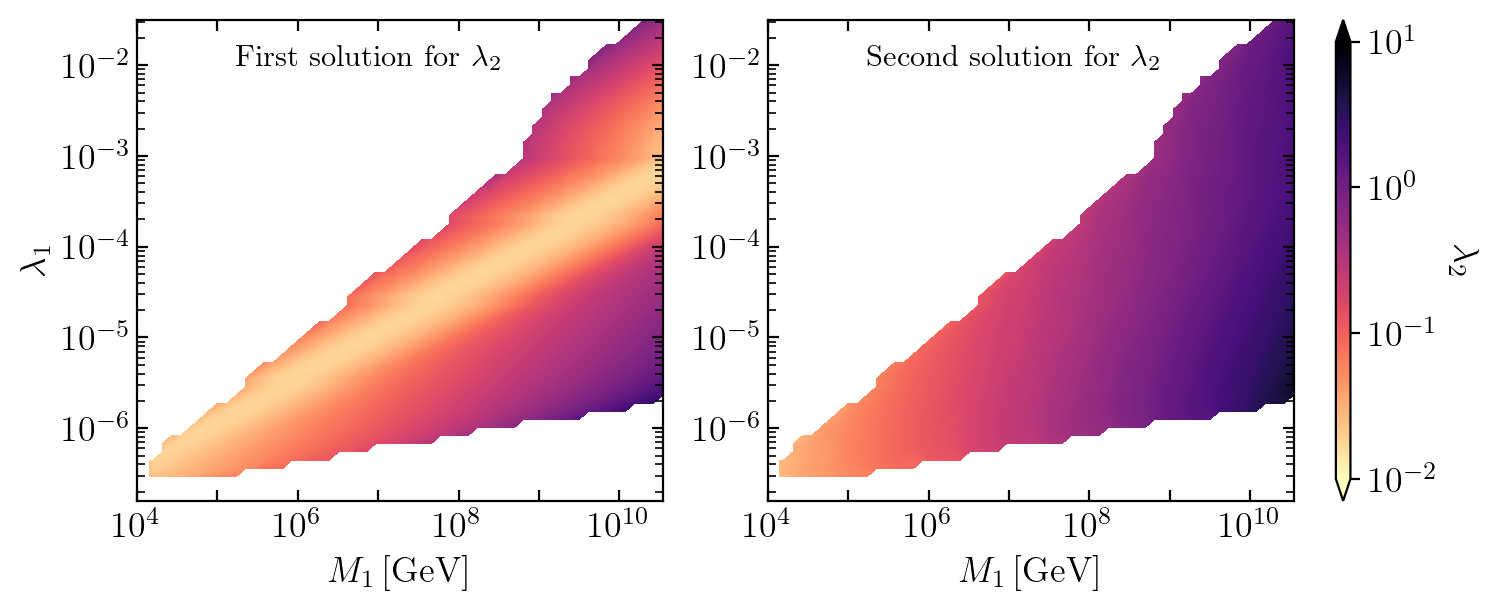

In [111]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(0.7*6.5*2, 0.7*6.5*0.7), dpi=200)

Xx = M1_s
Yy = lambda_1s
            
Zzl_1 = np.transpose(lambda2_solutions_ParSpace[:,:,0])
Zzl_2 = np.transpose(lambda2_solutions_ParSpace[:,:,1])

#lambda_2
CS1_1 = ax1.contourf(Xx, Yy, Zzl_1, cmap='magma_r', levels=np.logspace(-2, 1, 1000), norm=LogNorm(), extend='both') 
CS1_2 = ax2.contourf(Xx, Yy, Zzl_2, cmap='magma_r', levels=np.logspace(-2, 1, 1000), norm=LogNorm(), extend='both') 


kwargs = {'format': '%.1f'}
cbb = fig.colorbar(CS1_2, ax=[ax1, ax2], aspect=30, **kwargs, pad=0.03) 

# Set log scale
cbb.ax.set_yscale('log')  # Make colorbar use log scale
cbb.ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0))  # Set major ticks in log scale
cbb.ax.yaxis.set_minor_locator(ticker.NullLocator())  # Removes minor ticks
cbb.ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())  # Format as scientific notation
cbb.set_label(r'$\lambda_2$', fontsize=13, rotation=270, labelpad=15)
cbb.ax.tick_params(labelsize=13)

# cbb.ax.set_yscale('log')  # Make colorbar use log scale
# cbb.ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0))  # Set major ticks in log scale
# cbb.ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto'))  # Add minor ticks
# cbb.ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())  # Format as scientific notation

ax1.text(0.17e6, 1e-2, r'First solution for $\lambda_2$', fontsize=11)
ax2.text(0.17e6, 1e-2 , r'Second solution for $\lambda_2$', fontsize=11)

#Axes ticks and labels
for ax in [ax1, ax2]:
#     ax.text(4.15, -6.8, r'$M_2=10 M_1$', color='k', fontsize=11, rotation = 0, zorder = 1.6)
    ax.set_xlabel(r'$M_1\,[\rm{GeV}]$ ',fontsize=13)
#    ax.set_ylabel(r'$\log_{10}\left(\lambda_1\right)$', fontsize=11, labelpad=1)
    ax.tick_params(which='both', bottom=True, top=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length = 4, labelsize=13, pad=2)
    ax.tick_params(axis='both', which='minor', direction='in', length = 3, labelsize=13)
   
    ax.tick_params(axis='x', which='major', pad=4)  # Increase padding for main plot ticks
    


    ax.set_xlim(1e4, Xx[-5])
    ax.set_ylim(Yy[-1], Yy[0])
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
        # **Manually Set Major Tick Positions**
    major_ticks = [1e4, 1e5, 10**6, 10**7, 10**8, 10**9, 10**10]  # Define exact positions
    ax.set_xticks(major_ticks)
    ax.figure.canvas.draw()

    # **Manually Set Major Tick Labels**
#     ax.set_xticklabels([r'', r'$10^6$', r'$ $', r'$10^8$', r'$ $', r'$10^{10}$', ' '])
    ax.set_xticklabels([r'$10^4$',r'',  r'$10^6$',r'$ $',  r'$10^{8}$',r'$ $', r' $10^{10}$'])

    
    
ax1.set_ylabel(r'$\lambda_1$', fontsize=13)

# plt.savefig('/home/mar/Dropbox/Thesis/Figures/LOMPS.pdf', bbox_inches='tight', transparent=True)
### plt.savefig('/home/mar/Dropbox/Thesis/Defensa/Figures/LOMPS.pdf', bbox_inches='tight', transparent=True)

plt.show()